Random Walk(RW) is granted with a wide interest. One might think of a varying price of a stock as a typical example. And it is manifesting in other places: the motion of water in a sponge medium, culture diffusion, pollen in water under microscope... Impressive!

But mathematically and physically, FP Time(FP time) is more interesting to scientists. Going back to the stock price case, this manifests as: when a particular stock will hit a price for the first time ever, how possible to first hit price A than price B, and further, how is the likelihood of ever reaching price A changes with time...All these can be addressed and be contributed to the properties of random walks.

There are many kinds of random walks and properties that have been derived during the past years. Due to time limit, only a corner of the iceberg is reflected in this template file as below.

Any random walk consists of 3 crucial factors: a time domain, a position domain and random walking rules. The time domain can be either discrete or continuous, so is the space domain. The Pearson random walk is based on a discrete time domain and a discrete space domain. And each time it walks for a fixed step size at any angle to the current position.

This template gives code to a hopping process: a random walk on the integer domain $\Z$ (discrete domain) which jumps to either of its neighboring points(random walking rule) at random hopping times--that's continuous.

Following what is introduced, this template contains mainly 3 parts of code to compute:
- the position of a random walk at a given time
- the emperical visiting frequencies and verification with the theoretial solution.
- the FP time of any given point and verifacation of the decaying rate of frequencies with time.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.special import iv
import numpy as np
import scipy
import math
import random

<img src="hopping process.jpg" alt="An image of the hopping process: a random walk starts form 0 and hops to wither leaft with probability p or to right with probability 1-p at each random time point">

The probabilities to the right and to the left are identical for any point on $\Z$. But the probability to left, $(p)$ doesn't necessarily need to be equal to that of to the right $q$, as long as they sum up to 1. Here we pay attention to the special case when $p=q=0.5$.

In this case it's easy to show that simulating such a process is equivalent to simulating the Compound Poisson Process woth a certain value of parameter $\lambda$.

## Simulation

- Simulate 100,000 simulations of a symmetric hopping process under the time interval [0, 10] with $\lambda=4$, starting from 0.
- All steps required to simulate 1 simulation is aggregated in 'random_walk_pos_time', and for 100,000 simulations, 'multi_random_walk' is constructed to store them in different dicts.

In [2]:
def cumsum_poisson(lamb, x):
    """
    Return P(X=x) for a Poisson distribution with lambda parameter.
    """

    cum_sum = 0
    for i in range(0, x+1):
        cum_sum += lamb**i/math.factorial(i)
    cum_sum *= np.exp(-lamb)

    return cum_sum


In [4]:
def num_of_events(lamb, t, sim):
    """
    Return a simulated realization from a Poisson distribution, which is the number of events.
    """

    i = 0
    while True:
        if cumsum_poisson(lamb*t, i) >= sim:
            return i
        else:
            i+=1


In [5]:
def time_occurr(t, event_num):
    """
    Return the simulated jump times for the number of events given by event_num.
    t: right limit of the time interval, which is 10 here.
    event_num: number of events, returned by num_of_events.
    """

    jump_times = np.array([0,])
    for _ in range(0, event_num):
        time = random.uniform(0, t)
        jump_times = np.append(jump_times, time)
    
    jump_times = np.sort(jump_times)
    return jump_times


In [6]:
def jump_up_down(event_num):
    """
    Return the jump size, either +1 or -1, for each jump.
    event_num: number of events, returned by num_of_events.
    """

    jumps = np.array([0,])
    jumps = np.append(jumps, np.random.choice(([-1, 1]), size=event_num))
    pos = np.cumsum(jumps)

    return pos


The steps above are aggregated together in the function below.

In [7]:
def random_walk_pos_time(lamb, t, sim):
    """
    Return one simulation with the jump times and the positions after it jumps.
    """
    event_num = num_of_events(lamb, t, sim)
    jump_times = time_occurr(t, event_num)
    jump_pos = jump_up_down(event_num)

    return(jump_times, jump_pos)
    

In [8]:
def multi_random_walk(lamb, t, sim_num):
    """
    Return 100,000 random walks and store them in different dicts.
    """

    rw_time = dict()
    rw_pos = dict()

    for i in range(sim_num):
        u = random.uniform(0, 1)
        rw_time[f"sim_{i+1}"] = random_walk_pos_time(lamb, t, sim=u)[0]
        rw_pos[f"sim_{i+1}"] = random_walk_pos_time(lamb, t, sim=u)[1]

        if i%100 == 0:
            print(f"The {i}th iteration stops.")

    return (rw_time, rw_pos)


- aggregation of simulation

In [9]:
random.seed(42)
#u = random.uniform(0, 1)
time, pos = multi_random_walk(lamb=4, t=10, sim_num=100000)

The 0th iteration stops.
The 100th iteration stops.
The 200th iteration stops.
The 300th iteration stops.
The 400th iteration stops.
The 500th iteration stops.
The 600th iteration stops.
The 700th iteration stops.
The 800th iteration stops.
The 900th iteration stops.
The 1000th iteration stops.
The 1100th iteration stops.
The 1200th iteration stops.
The 1300th iteration stops.
The 1400th iteration stops.
The 1500th iteration stops.
The 1600th iteration stops.
The 1700th iteration stops.
The 1800th iteration stops.
The 1900th iteration stops.
The 2000th iteration stops.
The 2100th iteration stops.
The 2200th iteration stops.
The 2300th iteration stops.
The 2400th iteration stops.
The 2500th iteration stops.
The 2600th iteration stops.
The 2700th iteration stops.
The 2800th iteration stops.
The 2900th iteration stops.
The 3000th iteration stops.
The 3100th iteration stops.
The 3200th iteration stops.
The 3300th iteration stops.
The 3400th iteration stops.
The 3500th iteration stops.
The 

In [10]:
# notice: the index of the simulations start from 1
rw_time = time
rw_pos = pos

## Emperical Visiting Frequencies and verification with the theoretical solution.

Now that we have hundreds of thousands of walks, it's natural to wonder where these walks have been. It's trivial to get access to the track of any walk by calling $'rw \_pos'$ with index $'[sim \_i]'$ for any interested $i$. But figuring out at which point it is at some certain time is not easy with observing and counting. Also, we also want to know how frequently these random walks hit some point up to some time. 

To do this, the following function '$toget \_position$' and '$count \_ freq$' are constructed.

In [11]:
def toget_position(time, time_sim, position_sim, num_sim):
    """
    Return the position of any given time for all random walk simulations.
    time: float, the time point of interest.
    time_sim: dict, the time of occurrences of the simulation.
    position_sim: dict, to store the positions of the simulations.
    """

    position_to_time = np.array([])
    for i in range(num_sim):
        for j in range(len(time_sim[f"sim_{i+1}"])-1):
            if time_sim[f"sim_{i+1}"][j] <= time and time_sim[f"sim_{i+1}"][j+1] > time:
                position_to_time = np.append(position_to_time, position_sim[f"sim_{i+1}"][j])

        if time >= time_sim[f"sim_{i+1}"][len(time_sim[f"sim_{i+1}"])-1]:
                # for the time later than the latest occurrence, append the last position
            position_to_time = np.append(position_to_time, position_sim[f"sim_{i+1}"][len(time_sim[f"sim_{i+1}"])-1])
    
        if i%100==0:
            print(f"The {i}th iteration ends.")

    return position_to_time


For the time interval [0, 10], we extract the potision at time 1, 2, 5, 7.5 and 9.5 respectively.

In [12]:
position_to_time_1 = toget_position(1, rw_time, rw_pos, num_sim=100000)
position_to_time_2 = toget_position(2, rw_time, rw_pos, num_sim=100000)
position_to_time_5 = toget_position(5, rw_time, rw_pos, num_sim=100000)
position_to_time_75 = toget_position(7.5, rw_time, rw_pos, num_sim=100000)
position_to_time_95 = toget_position(9.5, rw_time, rw_pos, num_sim=100000)

The 0th iteration ends.
The 100th iteration ends.
The 200th iteration ends.
The 300th iteration ends.
The 400th iteration ends.
The 500th iteration ends.
The 600th iteration ends.
The 700th iteration ends.
The 800th iteration ends.
The 900th iteration ends.
The 1000th iteration ends.
The 1100th iteration ends.
The 1200th iteration ends.
The 1300th iteration ends.
The 1400th iteration ends.
The 1500th iteration ends.
The 1600th iteration ends.
The 1700th iteration ends.
The 1800th iteration ends.
The 1900th iteration ends.
The 2000th iteration ends.
The 2100th iteration ends.
The 2200th iteration ends.
The 2300th iteration ends.
The 2400th iteration ends.
The 2500th iteration ends.
The 2600th iteration ends.
The 2700th iteration ends.
The 2800th iteration ends.
The 2900th iteration ends.
The 3000th iteration ends.
The 3100th iteration ends.
The 3200th iteration ends.
The 3300th iteration ends.
The 3400th iteration ends.
The 3500th iteration ends.
The 3600th iteration ends.
The 3700th it

now define the function to count the frequency

In [13]:
def count_freq(arr, num_sim=100000):
    """
    Return the position visited and the frequencies of visited positions.
    arr: array, the simulation to be counted.
    n: int, the length of the array.
    """

    pos_freq = dict()

    for i in range(num_sim):
        if arr[i] in pos_freq:
            pos_freq[arr[i]] += 1
        else:
            pos_freq[arr[i]] = 1

    return (list(pos_freq.keys()), list(i/num_sim for i in pos_freq.values()))


In [14]:
pos_visited_1, freq_1 = count_freq(position_to_time_1)
pos_visited_2, freq_2 = count_freq(position_to_time_2, len(position_to_time_2))
pos_visited_5, freq_5 = count_freq(position_to_time_5, len(position_to_time_5))
pos_visited_75, freq_75 = count_freq(position_to_time_75, len(position_to_time_75))
pos_visited_95, freq_95 = count_freq(position_to_time_95, len(position_to_time_95))

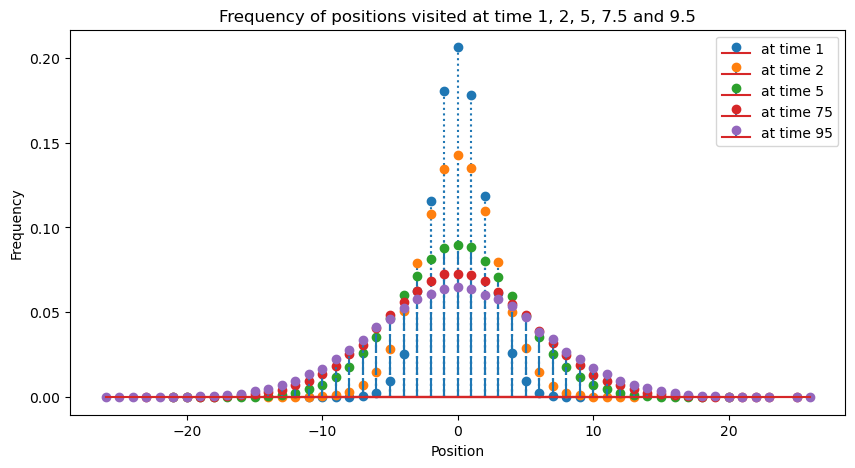

In [15]:
figure(figsize=(10, 5))
plt.stem(pos_visited_1, freq_1, linefmt=':', label=r"at time 1")
plt.stem(pos_visited_2, freq_2, linefmt=":", label=r"at time 2")
plt.stem(pos_visited_5, freq_5, linefmt="-.", label=r"at time 5")
plt.stem(pos_visited_75, freq_75, linefmt="--", label=r"at time 75")
plt.stem(pos_visited_95, freq_95, linefmt=":", label=r"at time 95")
plt.title("Frequency of positions visited at time 1, 2, 5, 7.5 and 9.5")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The histogram plot shows the frequencies of each point visited up to time 1, 2, 5, 7.5 and 9.5 of 100,000 simulations. It can be clearly seen that as the time boundatry is relaxed greater and greater, the frequencies close to the inital value 0 is diffused to left and right, rendering the histogram more and more heavily-tailed.

- Verify the visiting frequency from the simulated result with the analytical solution at time 9.5.

The analytical expression of visiting probability is given by: $$P(n, t) = e^{-\lambda t}I_{n}(\lambda t)$$, where $I_n(z)$ is the modified Bessel function of the first kind of order $n$. The code is contained in the function '$toget\_ visit\_ prob$'.

In [16]:
def toget_visit_prob(time, lam):
    """
    Return the visiting probability P(n t), n are integers between -45 and 45.
    time: float, time of interest.
    lam: lambda, specified at the very beginning as 4.
    """

    visit_prob = np.array([])
    for n in np.linspace(-20, 20, 41):
        visit_prob = np.append(visit_prob, scipy.special.iv(n, lam*time)*np.exp(-lam*time))

    return visit_prob

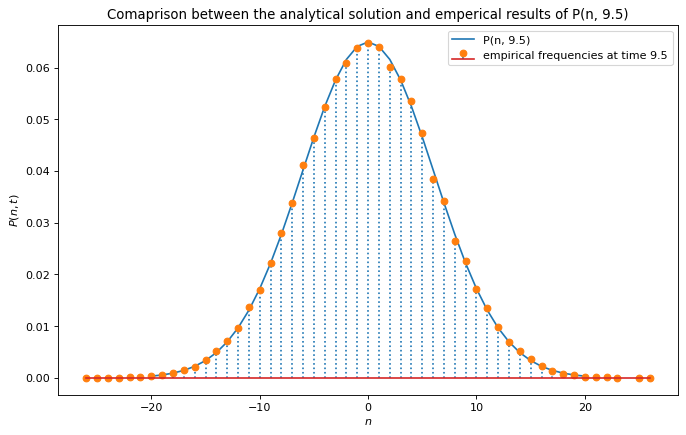

In [17]:
figure(figsize=(10, 6), dpi=80)
x = np.linspace(-20, 20, 41)
y = toget_visit_prob(9.5, 4)
plt.plot(x, y, label=r"P(n, 9.5)")
plt.stem(pos_visited_95, freq_95, linefmt=":", label= r"empirical frequencies at time 9.5", orientation="vertical")
plt.title('Comaprison between the analytical solution and emperical results of P(n, 9.5)')
plt.xlabel('$n$')
plt.ylabel('$P(n, t)$')
plt.legend()
plt.show()


- To see another verification of emperical visiting frequency and the theoreical solution, say P(n, 2):

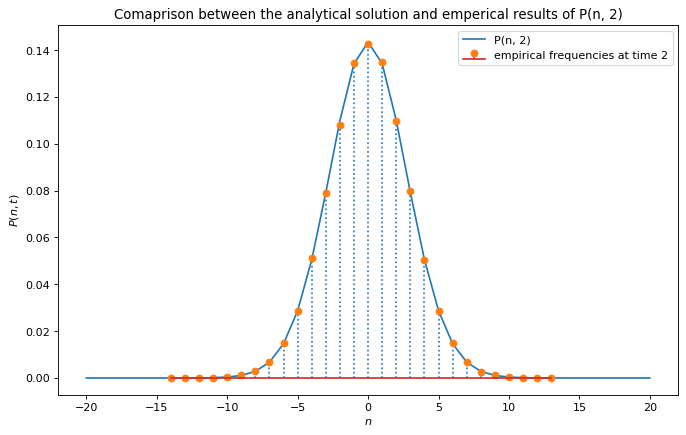

In [18]:
figure(figsize=(10, 6), dpi=80)
x = np.linspace(-20, 20, 41)
y = toget_visit_prob(2, 4)
plt.plot(x, y, label=r"P(n, 2)")
plt.stem(pos_visited_2, freq_2, linefmt=":", label= r"empirical frequencies at time 2", orientation="vertical")
plt.title('Comaprison between the analytical solution and emperical results of P(n, 2)')
plt.xlabel('$n$')
plt.ylabel('$P(n, t)$')
plt.legend()
plt.show()

## FP Time and Decaying rate

Having introduced FP time, a function '$get\_ first\_ passage\_ index$' is defined to get the index of FP of any point and the corresponding time indexed at that point. Note that the FP to 0 is interested, then the FP is also called return time.

In [19]:
def get_first_passage_index(simulation, target, ind=None):
    """
    Return the index at which a simulation hits a target for the first time.
    ind: the index of the time point at which it hits the target for the first time, set default as None.
    If the target is not met on the whole chain of random walk, index is None.
    """
    for i in range(len(simulation)):
        if target == 0:
            # skip this and iterate from the next item
            if simulation[min(i+1, len(simulation)-1)] == target:
                ind = i+1
                break
        elif simulation[i] == target:
            ind = i
            break
    return ind

In [20]:
def first_passage(rw_pos, rw_time, pos, num_sim, thresh=0):
    """
    Return an array of first passage times of a dataframe to a position for a given threshold.
    rw_pos: the set of simulations of positions.
    rw_time: the set of time corresponding to the position simulations.
    pos: the position of interest.
    num_sim: the number of simulations used
    thresh: a closed upper bound set for finding the first passage time. Maximum value is 10, the max of the time interval.
    """

    first_passage_time = np.array([])
    sim_ind = np.array([])

    for i in range(num_sim):
        if i%1000==0:
            print(f"the {i} th iteration starts")
        
        fp_index = get_first_passage_index(rw_pos[f'sim_{i+1}'], pos, ind=None)
    
        if fp_index == None:
            continue
        elif rw_time[f'sim_{i+1}'][fp_index] > thresh:
            continue
        else:
            first_passage_time = np.append(first_passage_time, rw_time[f'sim_{i+1}'][fp_index])
            sim_ind = np.append(sim_ind, i)

    return first_passage_time, sim_ind


In [21]:
fp_time_p_1, sim_ind_p_1 = first_passage(rw_pos, rw_time, pos=1, num_sim=100000, thresh=10)
fp_time_p_2, sim_ind_p_2 = first_passage(rw_pos, rw_time, pos=2, num_sim=100000, thresh=10)
fp_time_p_3, sim_ind_p_3 = first_passage(rw_pos, rw_time, pos=3, num_sim=100000, thresh=10)

the 0 th iteration starts
the 1000 th iteration starts
the 2000 th iteration starts
the 3000 th iteration starts
the 4000 th iteration starts
the 5000 th iteration starts
the 6000 th iteration starts
the 7000 th iteration starts
the 8000 th iteration starts
the 9000 th iteration starts
the 10000 th iteration starts
the 11000 th iteration starts
the 12000 th iteration starts
the 13000 th iteration starts
the 14000 th iteration starts
the 15000 th iteration starts
the 16000 th iteration starts
the 17000 th iteration starts
the 18000 th iteration starts
the 19000 th iteration starts
the 20000 th iteration starts
the 21000 th iteration starts
the 22000 th iteration starts
the 23000 th iteration starts
the 24000 th iteration starts
the 25000 th iteration starts
the 26000 th iteration starts
the 27000 th iteration starts
the 28000 th iteration starts
the 29000 th iteration starts
the 30000 th iteration starts
the 31000 th iteration starts
the 32000 th iteration starts
the 33000 th iteration 

- plotting of FP time of 1.

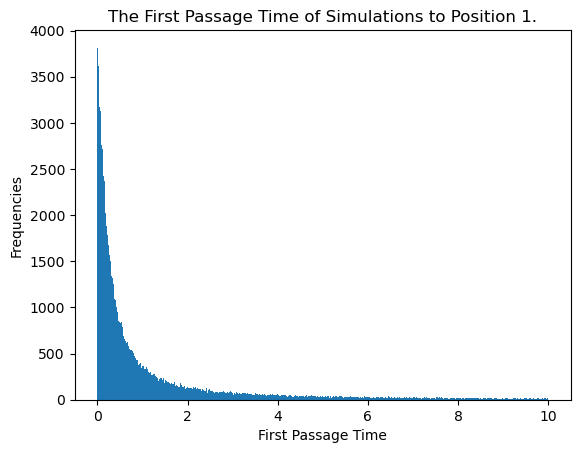

In [22]:
plt.hist(fp_time_p_1, bins=500)
plt.xlabel('First Passage Time')
plt.ylabel('Frequencies')
plt.title('The First Passage Time of Simulations to Position 1.')
plt.show()

This plot gives a straight-forward view of how the FP time to 1 is distributed. However, this plot doesn't give any probability distribution plot of the FP times. To see this, we need to draw upon equal-binning frequency plot.

### Equal frequency binning histogram.

The equal frequency binning histogram allocates elements in each bin, so that the areas of bins are identical. This plotting method is an effective way to infer probability distribution if only limited number of data simulations are available.

And in order to infer the probability distribution, we need to, in addition to the equal-frequency binning, find the central mass of each bin, which is the mid-point of a bin on it's top surface, and to connect them.


In [23]:
def get_indexes(N, bins):
    """
    Return the indexes of boundaries.
    N: the length of the simulation.
    bins: the number of bins, which must be a non-zero devider of N.
    """
    
    index_list = np.array([0, ])
    i = 0
    while True:
        i += N // bins - 1
        index_list = np.append(index_list, i)
        # how to deal with the tail points: combine in the last bin
        if (N - i) < int(N / bins):
            index_list[-1] = N-1
            return index_list


In [24]:
get_indexes(len(fp_time_p_1), 30)

array([    0,  2911,  5822,  8733, 11644, 14555, 17466, 20377, 23288,
       26199, 29110, 32021, 34932, 37843, 40754, 43665, 46576, 49487,
       52398, 55309, 58220, 61131, 64042, 66953, 69864, 72775, 75686,
       78597, 81508, 84419, 87379])

In [36]:
def boundary_height_equal_binning(x, bins):
    """
    Return the boundaries and the heights of the equal-binning histogram, as well as central masses of each bin.
    x: simulations
    bins: the number of bins.
    """
    
    heights = np.array([])
    boundaries = np.array([])
    central_mass = np.array([])

    N = len(x)
    area = 1 / bins
    x_sorted = np.sort(x)

    index_list = get_indexes(N, bins)
    for i in range(len(index_list)-1):
        boundaries = np.append(boundaries, x_sorted[index_list[i]])
        heights = np.append(heights, area / (x_sorted[index_list[i+1]] - x_sorted[index_list[i]]))
        central_mass = np.append(central_mass, np.average(x_sorted[index_list[i]:index_list[i+1]]))

    boundaries = np.append(boundaries, x_sorted[-1])
    heights = np.append(heights, heights[-1])

    return boundaries, heights, central_mass

In [37]:
boundaries, heights, central_mass = boundary_height_equal_binning(fp_time_p_1, 30)
heights

array([2.21194826, 2.12164326, 1.93614914, 1.79860403, 1.72769208,
       1.559977  , 1.46923947, 1.38365759, 1.22947133, 1.15014802,
       1.02381722, 0.92553452, 0.81040991, 0.73107825, 0.64276515,
       0.54010371, 0.47474631, 0.40050589, 0.34031364, 0.2964847 ,
       0.22878224, 0.19094075, 0.14500709, 0.114735  , 0.08207494,
       0.06075262, 0.0423081 , 0.02767737, 0.01787151, 0.00951469,
       0.00951469])

C:\Users\Luyuan Wang\AppData\Local\Temp\ipykernel_17088\2412067400.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(boundaries, heights, linefmt=':', markerfmt=' ', basefmt=' ', use_line_collection=True)


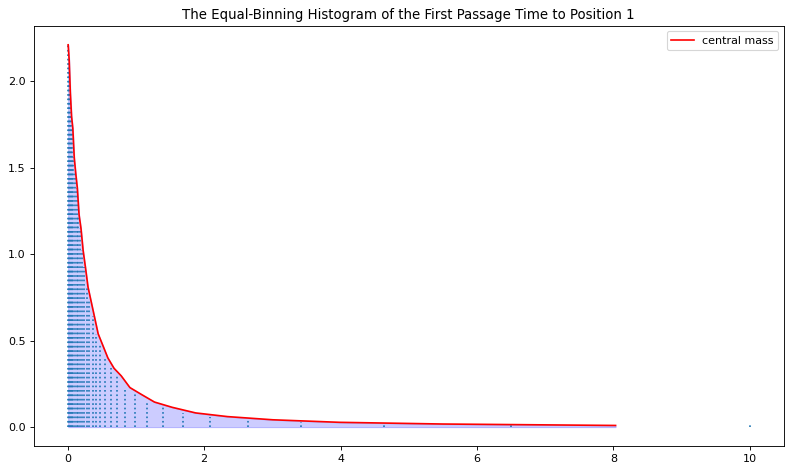

In [58]:
figure(figsize=(10, 6), dpi=80)
plt.stem(boundaries, heights, linefmt=':', markerfmt=' ', basefmt=' ', use_line_collection=True)
plt.fill_between(central_mass, heights[0:30], color='blue', alpha=0.2)
plt.plot(central_mass, heights[0:30], color='red', label='central mass')
plt.title("The Equal-Binning Histogram of the First Passage Time to Position 1")
plt.legend()
plt.show()

### To see the decaying rate of FP.

Set the $x$ and $y$ axis to log scale respectively.

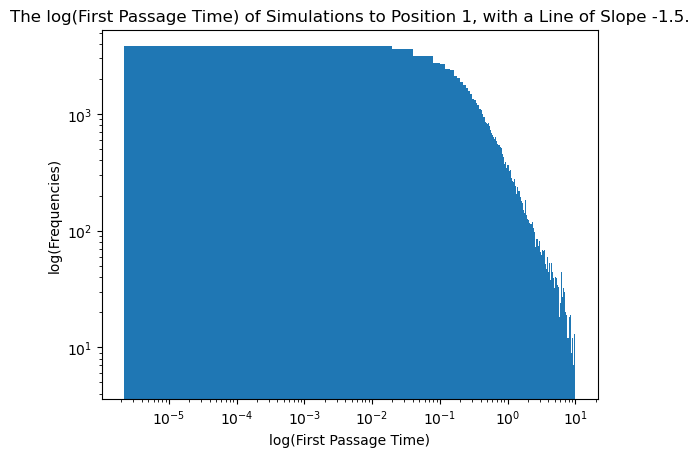

In [51]:
plt.hist(fp_time_p_1, bins=500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(First Passage Time)')
plt.ylabel('log(Frequencies)')
plt.title('The log(First Passage Time) of Simulations to Position 1, with a Line of Slope -1.5.')
plt.show()

From the plot, we set both the $x$ and $y$ axis on a log scale. It can be clearly seen from the plot that the frequency from $10^{-5}$ to $10^{-1.5}$ is almost constant, and from then it decays slowly and then quickly down to $10^1$. We interpret the 2 parts respectively. 

It's easy to interpret the former part: According to the histogram plotted above, the frequencies at early times around 0 are large and the log function blows very slowly for large numbers. So taking log values of them gives little change in the plot.

The second part draws a famous result from the Redner's book: the probability decays at $-\frac{3}{2}$ at t being very large. Therefore, we fit a line of this slope in the log-log plot, which is shown below. It's seen that the plot fits well.

This trend can be seen for other FP times: 1, and 2.

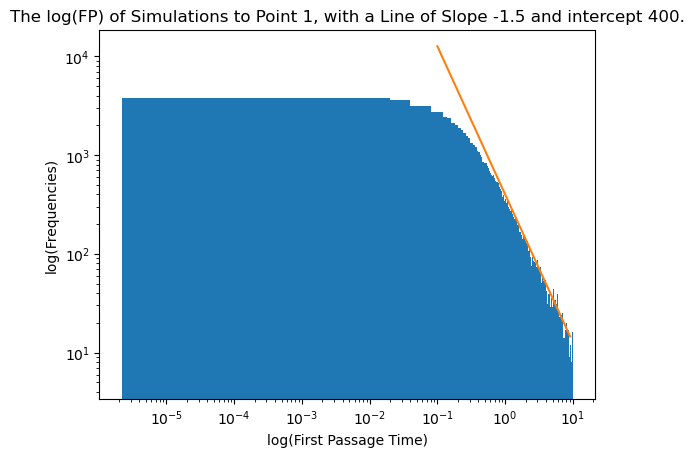

In [52]:
plt.hist(fp_time_p_1, bins=500)
plt.xscale('log')
plt.yscale('log')
plt.plot(np.arange(0.1, 10), 400*np.arange(0.1, 10)**(-1.5))
plt.xlabel('log(First Passage Time)')
plt.ylabel('log(Frequencies)')
plt.title('The log(FP) of Simulations to Point 1, with a Line of Slope -1.5 and intercept 400.')
plt.show()

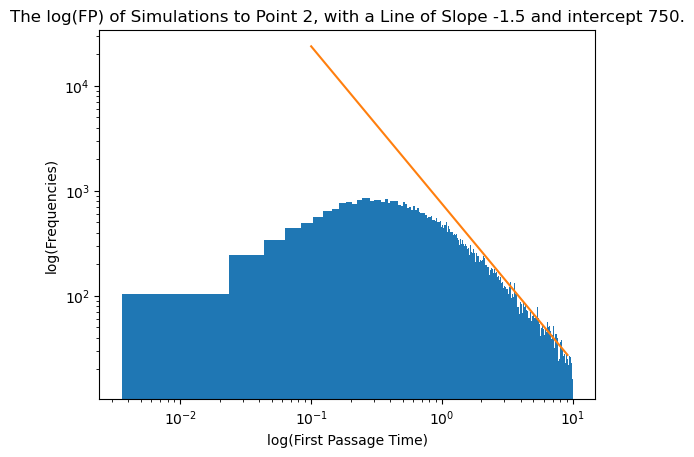

In [53]:
plt.hist(fp_time_p_2, bins=500)
plt.xscale('log')
plt.yscale('log')
plt.plot(np.arange(0.1, 10), 750*np.arange(0.1, 10)**(-1.5))
plt.xlabel('log(First Passage Time)')
plt.ylabel('log(Frequencies)')
plt.title('The log(FP) of Simulations to Point 2, with a Line of Slope -1.5 and intercept 750.')
plt.show()

Note: If the time interval is relaxed to be greater, say 20, or even 30, the same decaying rate can be seen in the plot of FP time at further positions such as 3, 4, and 5.